In [2]:
import requests
from bs4 import BeautifulSoup

# Import selenium necessities
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [20]:
# Set up the Chrome WebDriver
options = webdriver.ChromeOptions()
# options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument('--disable-blink-features=AutomationControlled')
driver = webdriver.Chrome(options=options)

URL = "https://www.personality-database.com/en-US/profile?pid=2&cid=3&type1=1"
driver.get(URL)
time.sleep(10)

In [ ]:
driver.quit()

In [23]:
next_page = driver.find_element(By.XPATH, '//button[@type="button" and @class="rc-pagination-item-link"]').click()

In [35]:
all_list_elements = driver.find_elements(By.XPATH, '//*[@id="root"]/div/section/main/div[1]/div[2]/div/div[4]/ul/li/a')
# In this case (by manual checking), element [-1] contains the last page number
number_of_pages = int(all_list_elements[-1].text)
print(number_of_pages)

210


In [43]:
page_source = driver.page_source
driver.quit()
soup = BeautifulSoup(page_source, "html.parser")

<html lang="en"><head>
    <meta charset="utf-8">
    <meta name="theme-color" content="#1D2029">
    <meta http-equiv="Cache-Control" content="no-cache">
    <meta name="apple-itunes-app" content="app-id=1614566357, app-argument=pdb://home">
    <meta http-equiv="expires" content="0">
    <meta http-equiv="pragma" content="no-cache">
    <meta name="naver-site-verification" content="9aa5a6cd22b149cd65d3656e8208fc59d0561d7d">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0">
    <link rel="icon" href="https://static1.personality-database.com/app_static/pdb-favicon.svg">
    <link rel="apple-touch-icon" href="https://static1.personality-database.com/app_static/pdb-favicon.svg">
    <link rel="apple-touch-icon-precomposed" href="https://static1.personality-database.com/app_static/pdb-favicon.svg">
    <link rel="preconnect" href="https://api.personality-database.com">
    <link rel="dns-prefetch" href="https://www.personality-database.com">
   
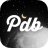
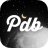

In [44]:
print(page_source)

In [45]:
results = soup.find("div", class_="profile-container")
type(results)

bs4.element.Tag

In [52]:
print("Result type: ", type(results))
print("Result length: " + str(len(results)))
print(results.contents)

Result type:  <class 'bs4.element.Tag'>
Result length: 58
[<a class="profile-card-link" href="/profile/68753/simon-seville-alvin-and-the-chipmunks-2007-mbti-personality-type" rel=""><div class="profile-card"><div class="base_row"><div class="lazyload-wrapper"><div class="avatar" style="border-radius: 8px;"><img alt="Alvin And The Chipmunks (2007): Simon Seville" src="https://static1.personality-database.com/profile_images/9f2c007b27564f559a73e10e29b5141a.png" style="border-radius: 8px;"/></div></div><div class="info"><h2 class="info-name">Simon Seville</h2><div class="info-subcategory"><img alt="" src="https://static1.personality-database.com/category_icon_v2/cat_3.png"/><label>Alvin And The Chipmunks (2007)</label></div></div><div class="type"><div class="vote-count"><label>1.6k Pdb Votes</label></div><div class="personality">ISTJ</div><div class="subtype">5w6</div></div></div><div class="top_analysis"><span class="content"><span class="quto">“</span><span class="text">INTP? what?? Oh

In [55]:
profile_char = results.find_all("div", class_="profile-card")
print(profile_char)

[<div class="profile-card"><div class="base_row"><div class="lazyload-wrapper"><div class="avatar" style="border-radius: 8px;"><img alt="Alvin And The Chipmunks (2007): Simon Seville" src="https://static1.personality-database.com/profile_images/9f2c007b27564f559a73e10e29b5141a.png" style="border-radius: 8px;"/></div></div><div class="info"><h2 class="info-name">Simon Seville</h2><div class="info-subcategory"><img alt="" src="https://static1.personality-database.com/category_icon_v2/cat_3.png"/><label>Alvin And The Chipmunks (2007)</label></div></div><div class="type"><div class="vote-count"><label>1.6k Pdb Votes</label></div><div class="personality">ISTJ</div><div class="subtype">5w6</div></div></div><div class="top_analysis"><span class="content"><span class="quto">“</span><span class="text">INTP? what?? Oh yes.</span><span class="quto">”</span></span></div><div class="divider"></div></div>, <div class="profile-card"><div class="base_row"><div class="lazyload-wrapper"><div class="avat

In [70]:
movie_char = results.find_all("div", class_="base_row")
count = 0
for char in movie_char:
    count +=1
    print(count, char, end="\n"*2)

1 <div class="base_row"><div class="lazyload-wrapper"><div class="avatar" style="border-radius: 8px;"><img alt="Alvin And The Chipmunks (2007): Simon Seville" src="https://static1.personality-database.com/profile_images/9f2c007b27564f559a73e10e29b5141a.png" style="border-radius: 8px;"/></div></div><div class="info"><h2 class="info-name">Simon Seville</h2><div class="info-subcategory"><img alt="" src="https://static1.personality-database.com/category_icon_v2/cat_3.png"/><label>Alvin And The Chipmunks (2007)</label></div></div><div class="type"><div class="vote-count"><label>1.6k Pdb Votes</label></div><div class="personality">ISTJ</div><div class="subtype">5w6</div></div></div>

2 <div class="base_row"><div class="lazyload-wrapper"><div class="avatar" style="border-radius: 8px;"><img alt="Star Wars: Darth Vader" src="https://static1.personality-database.com/profile_images/f1202cd4411c490d8edb69a1b157e01e.png" style="border-radius: 8px;"/></div></div><div class="info"><h2 class="info-nam

In [16]:
# char_element = movie_char[0].find("div", class_="info").find("h2", class_="info-name")
# print(char_element)

In [66]:
char_list = []
movie_list = []
mbti_list = []
vote_list = []
for i, char in enumerate(movie_char):
    char_element = movie_char[i].find("div", class_="info").find("h2", class_="info-name")
    movie_element = movie_char[i].find("div", class_="info").find("div", class_="info-subcategory").find("label")
    personality_element = movie_char[i].find("div", class_="type").find("div", class_="personality")
    votecount_element = movie_char[i].find("div", class_="type").find("div", class_="vote-count").find("label")

    char_list.append(char_element.text.strip())
    movie_list.append(movie_element.text.strip())
    mbti_list.append(personality_element.text.strip())
    vote_list.append(votecount_element.text.strip())

    # print(char_element.text.strip())
    # print(movie_element.text.strip())
    # print(personality_element.text.strip())
    # print(votecount_element.text.strip())
    # print()

In [61]:
import pandas as pd

In [69]:
istj_df = pd.DataFrame({'char': char_list, 'movie': movie_list, 'mbti': mbti_list, 'votes': vote_list})
istj_df.to_csv('../data/Data - ISTJ chars page 1.csv')
istj_df

,char,movie,mbti,votes
0,Simon Seville,Alvin And The Chipmunks (2007),ISTJ,1.6k Pdb Votes
1,Darth Vader,Star Wars,ISTJ,3.3k Pdb Votes
2,Tigress,Kung Fu Panda (Franchise),ISTJ,1.7k Pdb Votes
3,Maximus Decimus Meridius,Gladiator (2000),XXXX,972 Pdb Votes
4,Marlin,Finding Nemo (Franchise),ISTJ,1.1k Pdb Votes
5,Branch,Trolls (2016),ISTJ,508 Pdb Votes
6,Bolt,Bolt (2008),ISTJ,488 Pdb Votes
7,Alma “Abuela” Madrigal,Encanto (2021),ISTJ,1.9k Pdb Votes
8,Carl Fredricksen,Up (2009),ISTJ,1.7k Pdb Votes
9,Astrid Hofferson,How to Train Your Dragon (Franchise),ISTJ,1.3k Pdb Votes
